# Performance metrics#


**before we start**: to run this notebook you need a TradingWithPython module that can be downloaded from [here](http://www.tradingwithpython.com/?page_id=504)

Measuring strategy performance is essential for quantitative trading. It is needed for strategy optimisation and comparison. We will take a look at two commonly used performance metrics: *Sharpe* and *Drawdown*



## Sharpe ratio##

A definition of Sharpe ratio can be found on [Wikipedia](http://en.wikipedia.org/wiki/Sharpe_ratio), [Investopedia](http://www.investopedia.com/terms/s/sharperatio.asp) and many other places on the web. It is one of the most commonly used metrics for performance. 
Normally, the sharpe ratio is given by ![](http://i.investopedia.com/inv/dictionary/terms/sharpesratio.gif)

Most people use a simplified version of the formula with risk free rate of 0. This is perfectly OK as long as this calculation is used consistently and portfolio returns are significantly higher than risk-free rate.

Let's calculate Sharpe for SPY 

In [1]:
%pylab inline

import tradingWithPython as twp
twp.extra.setNotebookStyle()

Populating the interactive namespace from numpy and matplotlib


Got 5798 days of data


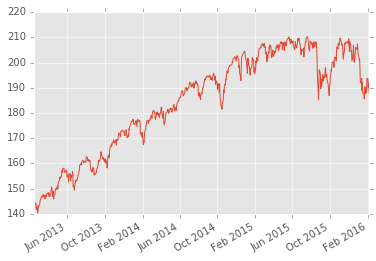

In [2]:
# to start with, get the price data
import tradingWithPython.lib.yahooFinance as yf

price = yf.getHistoricData('SPY')['adj_close'][-750:] # last three years of data
price.plot()

In [3]:
returns = price.pct_change() #daily returns

Sharpe = returns.mean()/returns.std()

print('Sharpe: ', Sharpe)



Sharpe:  0.047253022215442246


Well, this value seems to be quite low, the reason is that we've just calculated the *daily* sharpe ratio. To annualise this value, it must be multiplied by a square root of number of trading days in a year, which is (roughly) 250. A correct calculation would be:

In [4]:
Sharpe = sqrt(250)*returns.mean()/returns.std()

print('Sharpe: ', Sharpe)

Sharpe:  0.747135882637


Looking up the Sharpe on [YahooFinance](http://finance.yahoo.com/q/rk?s=SPY) should produce a very similar result. 

### Things to keep in mind###

* Sharpe assumes *normal* returns distribution, a misleading result is achieved if this is not a case. A good example would be a [bracket trade](http://matlab-trading.blogspot.nl/2011/04/when-sharpe-is-useless.html). 

* Be wary of fat tails. A high sharpe may lead you to using a high leverage, but a fat-tail event can trigger a margin call or your nerves. This happend to great many people and even institutions. The author is not an exception.


Because this function is used so often, it is included in the TradingWithPython toolbox:

In [5]:
import tradingWithPython as twp

print('Sharpe of SPY: ', twp.sharpe(returns))

Sharpe of SPY:  0.747135882637


## Drawdown##

The drawdown is pretty self-explanatory, it provides the worst loss and the duration of this loss. A function to calculate these values is provided in the *tradingWithPython* toolkit.The `drawdown` function returns two time series, first one for a *drawdown* in % and the second one for *drawdown duration* in days

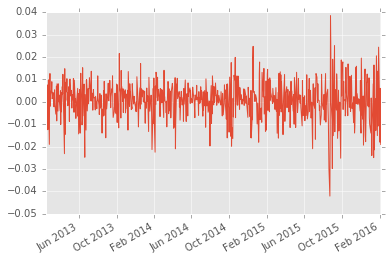

In [6]:
returns.plot()

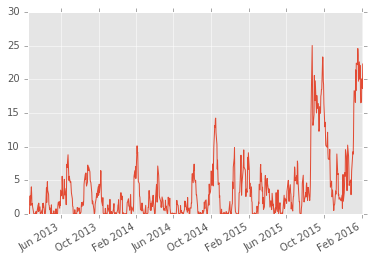

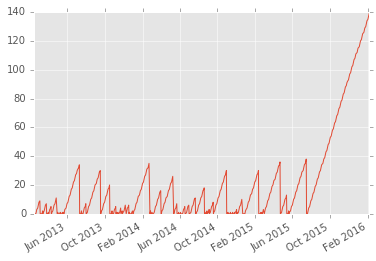

In [7]:
drawdown, duration = twp.drawdown(price) # the drawdown function accepts price or a accumulated pnl of a trading strategy

drawdown.plot()
figure()
duration.plot()


Now if you only desire to know the maximum drawdown, just get the `max()` values from the results:

In [8]:
print('Max drawdown %.2f ' %  drawdown.max())
print('Max duration %i days' % duration.max())

Max drawdown 25.04 
Max duration 139 days


# Profit ratio#

Next to the standard metric Sharpe and Drawdown I also often use a metric that I've defined (for) myself. I call it *profitRatio*. It is a ratio of total return of the strategy in a given period, divided by maximum drawdown in that period.


In [9]:
twp.profitRatio(returns)

4.3449494909421196